# Exploratory Data Analysis of Hotel Booking Demand

**The objective of this project is to perform Exploratory Data Analysis on a given dataset and gain some useful insights about trends in hotel bookings. These insights can serve as a valuable guidance for hotels to adapt their customer strategies and prepare for uncertainties.**

In [3]:
#Importing the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import imblearn as imb

In [6]:
import seaborn as sns

In [7]:
%matplotlib inline

In [8]:
import plotly.express as px

In [9]:
#Importing the dataset

In [10]:
df = pd.read_csv("hotel_bookings.csv")

In [12]:
#list of first 5 rows

In [13]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [14]:
#list of last 5 rows

In [15]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,9/7/2017


# The dataset has information about –

**Hotel**: Resort Hotel or City Hotel

**is_cancelled**: Value indicating if the booking was cancelled (1) or not (0)

**lead_time**: Number of days elapsed between entering date of the booking into the PMS and the arrival date.

**arrival_date_year**: Year of arrival date

**arrival_date_month**: Month of arrival date

**arrival_date_week_number**: Week number of year for arrival date

**arrival_date_day_of_month**: Day of arrival date

**stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guests stayed or booked to stay at the hotel.

**stays_in_week_nights**: Number of week nights (Monday to Friday) the guests stayed or booked to stay at the hotel.

**adults**: Number of adults

**children**: Number of children

**babies**: Number of babies

**meal**: Type of meal booked. Categories are presented in standard hospitality meal packages:
•	Undefined/SC – no meal package
•	BB – Bed & Breakfast
•	HB – Half board (breakfast and one other meal – usually dinner)
•	FB – Full board (breakfast, lunch and dinner)

**country**: Country of origin. Categories are represented in the ISO 3155–3:2013 format

**market_segment**: Market segment designation in categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.

**distribution_channel**: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.

**is_repeated_guest**: Value indicating if the booking name was from a repeated guest (1) or not (0).

**previous_cancellations**: Number of previous booking that were cancelled by the customer prior to the current booking.

**previous_bookings_not_cancelled**: Number of previous bookings not cancelled by the customer prior to the current booking.

**reserved_room_type**:  Code of room type reserved. Code is presented instead of designation for anonymity reasons.

**assigned_room_type**: Code for the type of room assigned to the booking. 

**booking_changes**: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.

**deposit_type**: Indication on if the customer made a deposit to guarantee the booking.

**agent**:ID of the travel agency that made the booking

**company**: ID of the company/entity that made the booking or responsible for paying the booking.

**days_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the customer.

**customer_type**: Type of booking, assuming one of four categories :
•	Contract - when the booking has an allotment or other type of contract associated to it;
•	Group – when the booking is associated to a group;
•	Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
•	Transient-party – when the booking is transient, but is associated to at least other transient booking

**adr**: Average Daily Rate

**required_car_parking_spaces**: Number of car parking spaces required by the customer.

**total_of_special_requests**: Number of special requests made by the customer.

**reservation_status**:  Reservation last status, assuming one of three categories:
•	Canceled – booking was canceled by the customer
•	Check-Out – customer has checked in but already departed
•	No-Show – customer did not check-in 

**reservation_status_date**: Date at which the last status was set. This variable can be used in conjunction with the Reservation Status to understand when was the booking canceled or when did the customer checked-out of the hotel



In [16]:
#shape

In [17]:
df.shape

(119390, 32)

*dataframe has 119390 rows and 32 columns*

In [19]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [20]:
#duplicated value count
df.duplicated().sum()

31994

There are 31994 duplicated values in the dataset


In [21]:
#dropping the duplicated values
df.drop_duplicates(inplace=True)

In [22]:
df.shape

(87396, 32)

In [23]:
# Missing/Null Values
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


* In Children column, will replace null values with 0 assuming that customer have no children.
* In Country column, will replace null values with 'others' assuming customer's country was not mentioned while booking.
* Agent and Company columns have large null values, it might be a case when customers did not book hotel through them. As these two columns have numeric data in it ,will replace them with zero.

In [25]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [26]:
# we can also see the unique values in the dataset

In [27]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [28]:
df['hotel'].value_counts()

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

In [29]:
df['meal'].value_counts()

BB           67978
SC            9481
HB            9085
Undefined      492
FB             360
Name: meal, dtype: int64

In [30]:
df['market_segment'].value_counts()

Online TA        51618
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

In [31]:
df['distribution_channel'].value_counts()

TA/TO        69141
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

In [32]:
df['total_of_special_requests'].value_counts()

0    43894
1    29017
2    11812
3     2317
4      320
5       36
Name: total_of_special_requests, dtype: int64

In [33]:
df['customer_type'].value_counts()

Transient          71986
Transient-Party    11727
Contract            3139
Group                544
Name: customer_type, dtype: int64

In [34]:
df['reservation_status'].value_counts()

Check-Out    63371
Canceled     23011
No-Show       1014
Name: reservation_status, dtype: int64

In [35]:
df['deposit_type'].value_counts()

No Deposit    86251
Non Refund     1038
Refundable      107
Name: deposit_type, dtype: int64

In [36]:
#creating a duplicate of the original dataset before making any changes in it
df1 = df.copy()

In [37]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [38]:
# replacing null values in children column with 0 assuming that family had 0 children
df1['children'].fillna(0, inplace=True)
# replacing null values in company and agent columns with 0 assuming those rooms were booked without company/agent
df1['company'].fillna(0, inplace=True)
df1['agent'].fillna(0, inplace=True)
#replacing null values in country as'others'
df1['country'].fillna('Others', inplace=True)

In [39]:
df1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [40]:
# dropping the company column as it contained a lot of null values compared to any other column
df1.drop(['company'], axis=1, inplace=True)

In [41]:
# dropping rows where no adults, children and babies are there, as no bookings were made that day
no_guest = df1[df1['adults'] + df1['children'] + df1['babies'] == 0]
df1.drop(no_guest.index, inplace=True)

In [42]:
# adding some new columns
df1['total_guests'] = df1['adults'] + df1['children'] + df1['babies']
df1['total_stay'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights']

In [43]:
df1['children'] = df1['children'].apply(np.int64)

In [44]:
df1['total_guests'] = df1['total_guests'].apply(np.int64)

In [45]:
pd.set_option('display.max_columns',33)

In [86]:
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,7/2/2015,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,7/3/2015,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,9/6/2017,2,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,9/7/2017,3,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,9/7/2017,2,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,9/7/2017,2,7


In [48]:
#checking the final shape of the dataset
df1.shape

(87230, 33)

# Data Vizualization


**1. TYPE OF HOTEL MOSTLY PREFERRED BY THE GUESTS**

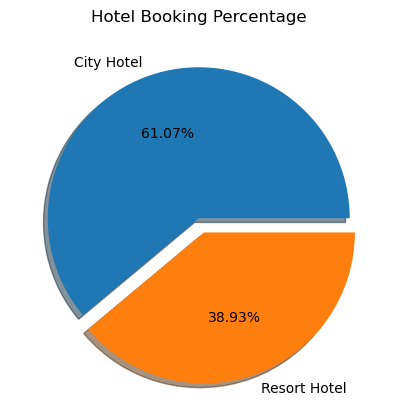

In [49]:
plt.figure(figsize = (5,5), dpi = 100)

plt.pie(df1['hotel'].value_counts().values,
        labels = df1['hotel'].value_counts().index,
        autopct = "%0.2f%%", explode = (0,0.1), shadow = True)

plt.title('Hotel Booking Percentage')

plt.show()


*City Hotel has maximum bookings and thus preferred by guests.*

**2. HOTEL BOOKING CANCELLATION**

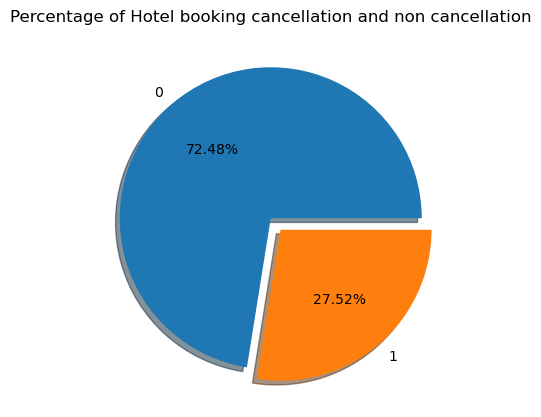

In [50]:
plt.figure(figsize = (5,5), dpi = 100)

plt.pie(df1['is_canceled'].value_counts().values,
        labels = df1['is_canceled'].value_counts().index,
        autopct = "%0.2f%%", explode = (0,0.1), shadow = True)

plt.title('Percentage of Hotel booking cancellation and non cancellation')

plt.show()



*72.48 % of hotel bookings were not cancelled and 27.52% of bookings were cancelled.*

**3. YEAR WITH MOST BOOKINGS**

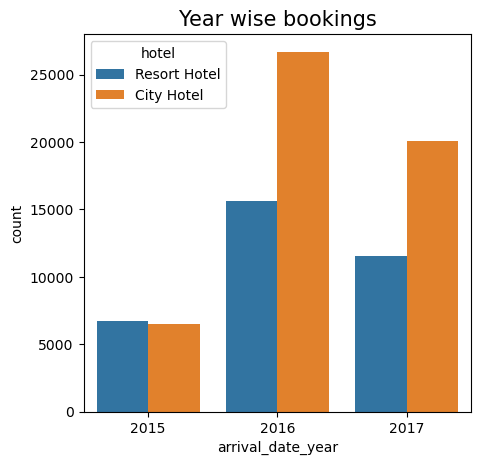

In [51]:
plt.figure(figsize = (5,5), dpi=100)

sns.countplot(x = df1['arrival_date_year'],hue = df1['hotel'])
plt.title('Year wise bookings', fontsize=15)
plt.show()

*In year 2016 hotel was booked mostly.*

**4. MONTH WITH MOST BOOKINGS**

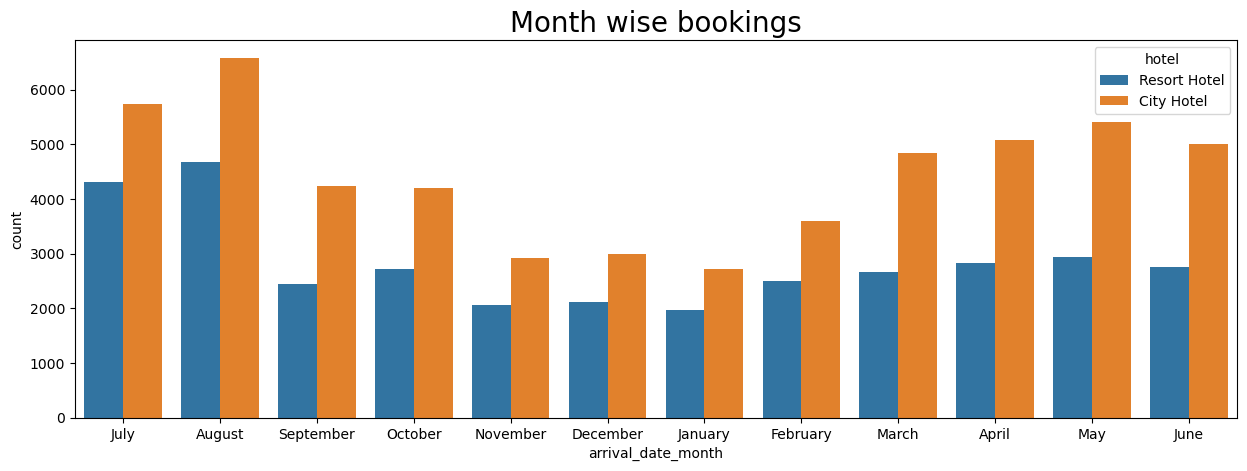

In [52]:
plt.figure(figsize = (15,5), dpi=100)

sns.countplot(x = df1['arrival_date_month'],hue = df1['hotel'])
plt.title('Month wise bookings', fontsize=20)
plt.show()

*Maximum bookings were made in the month of July and August.*

**5. GUESTS FROM EACH COUNTRY**

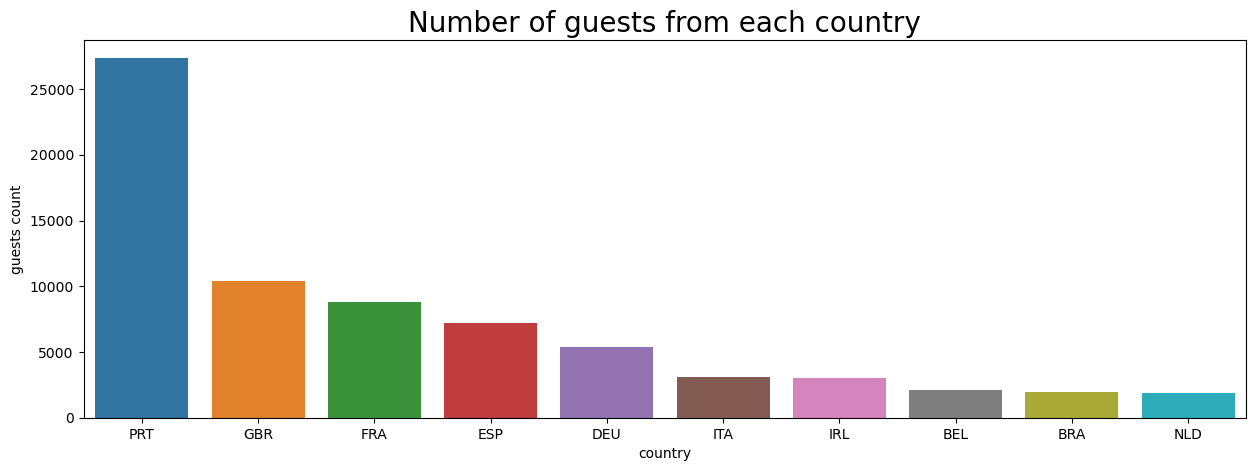

In [53]:
country_df = df1['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'guests count'})[:10]

plt.figure(figsize=(15,5), dpi=100)
sns.barplot(x=country_df['country'], y=country_df['guests count'])
plt.title('Number of guests from each country', fontsize=20)

plt.show()


*More than 25000 guests are coming from Portugal(PRT), followed by UK(GBR) and France(FRA).*

**6. TYPE OF MEAL PREFERRED BY GUESTS**

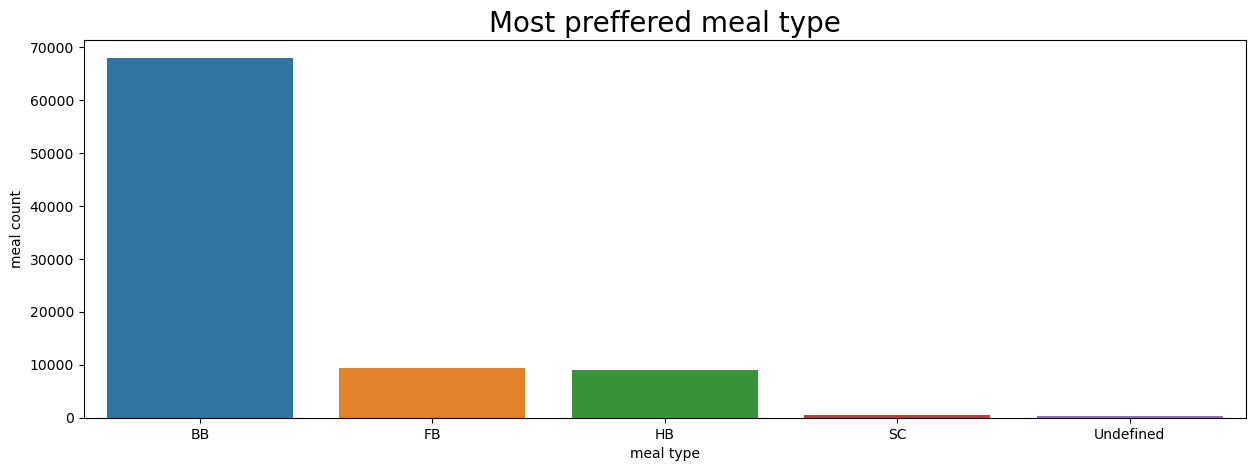

In [54]:
meal_count = df1.meal.value_counts()

meal_type = df1['meal'].unique()

meal_df = pd.DataFrame(zip(meal_type,meal_count), columns = ['meal type', 'meal count'])

plt.figure(figsize=(15,5), dpi=100)
g = sns.barplot(data=meal_df, x='meal type', y ='meal count')
g.set_xticklabels(meal_df['meal type'])
plt.title('Most preffered meal type', fontsize=20)

plt.show()

*The most preferred meal type by the guests is BB(Bed and Breakfast).*

**7. PREFERRED ROOM TYPE BY GUESTS**

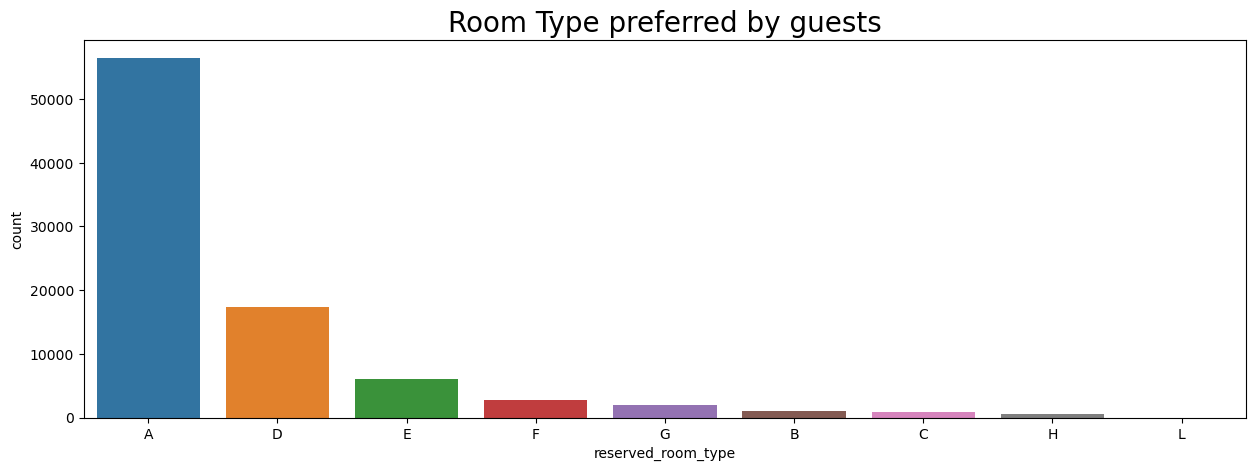

In [55]:
plt.figure(figsize=(15,5), dpi=100)


sns.countplot(x=df1['reserved_room_type'], order=df1['reserved_room_type'].value_counts().index)

plt.title('Room Type preferred by guests', fontsize=20)
plt.show()

*Room type A (almost 55,000) is preferred by the guests while booking the hotel.*

**8. ASSIGNED ROOM TYPE**

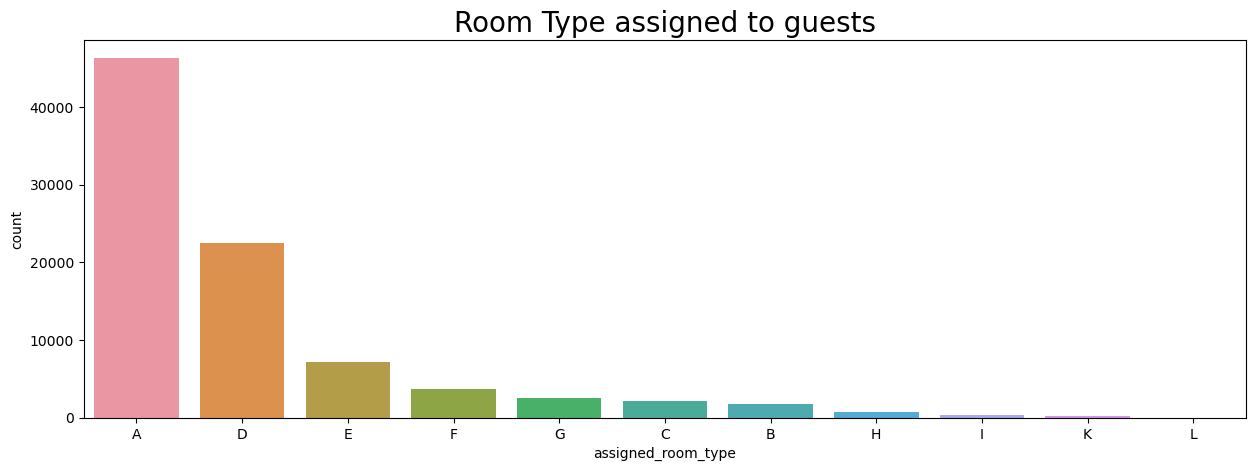

In [56]:
plt.figure(figsize=(15,5), dpi=100)


sns.countplot(x=df1['assigned_room_type'], order=df1['assigned_room_type'].value_counts().index)

plt.title('Room Type assigned to guests', fontsize=20)
plt.show()

*Room type A is mostly assigned to guests.*

**9. MOST USED BOOKING DISTRIBUTION CHANNEL**

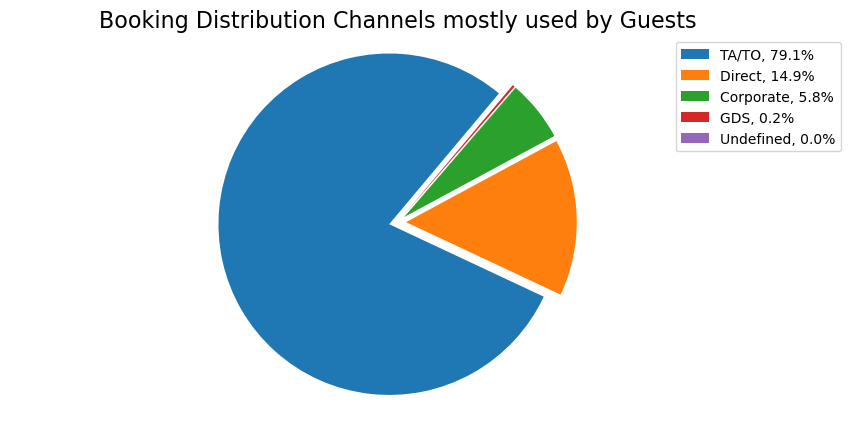

In [57]:

distb_df = df1['distribution_channel'].value_counts().reset_index()

distb_df = distb_df.rename(columns={'index':'Channel name', 'distribution_channel':'channel count'})


distb_df['percentage']=round(distb_df['channel count']*100/df1.shape[0],1)

plt.figure(figsize = (10,5), dpi = 100)

plt.pie(distb_df['channel count'], labels= None, explode = (0.05,0.05,0.05,0.05,0.05), startangle = 50)

labels = [f'{l}, {s}%' for l, s in zip(distb_df['Channel name'].value_counts().index.tolist(), distb_df['percentage'].values.tolist())]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

plt.title('Booking Distribution Channels mostly used by Guests' ,fontsize = 16)
plt.axis('equal')
plt.show()

*TA/TO(Travel Agents or Travel Operators) is the most used distribution channel by the customers.*

**10. TOP 10 AGENTS IN TERMS OF MOST BOOKINGS**

In [58]:
agents = df1.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns = {'count': 'Number of bookings'}).sort_values(by='Number of bookings',ascending=False)


 # as agent 0 was null value and we replaced it with 0 and indicates no bookings,so dropped
agents.drop(agents[agents['agent']==0].index,inplace=True) 

top_10 = agents[:10]



In [59]:
top_10

,agent,Number of bookings
9,9.0,28721
174,240.0,13028
14,14.0,3342
7,7.0,3294
183,250.0,2779
175,241.0,1644
27,28.0,1493
8,8.0,1383
1,1.0,1228
6,6.0,1117


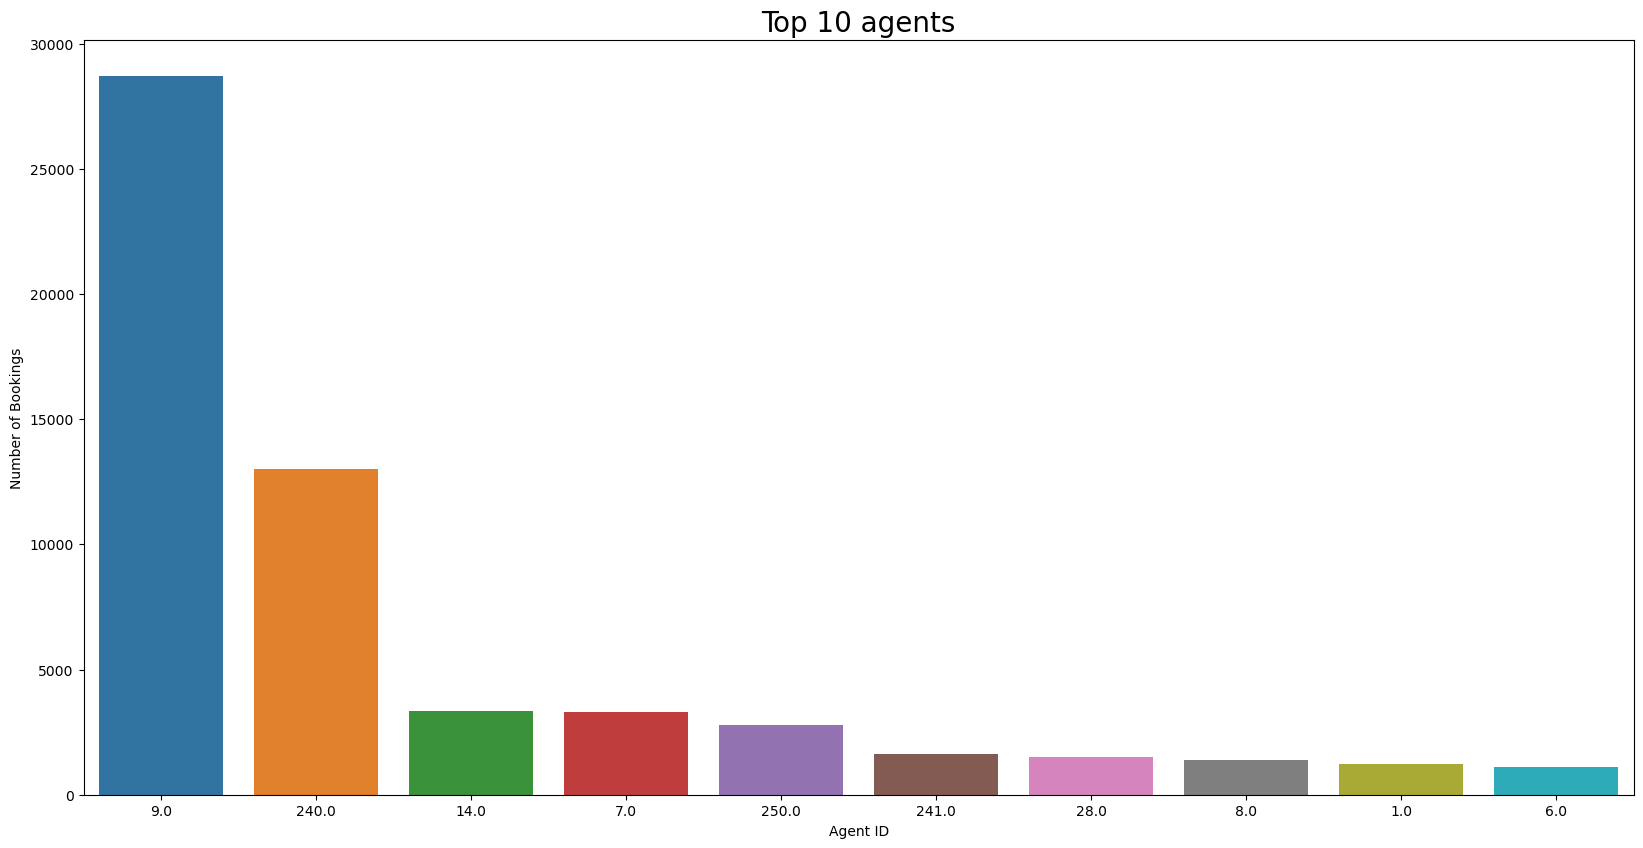

In [60]:
plt.figure(figsize=(20,10),dpi=100)

sns.barplot(x=top_10['agent'],y=top_10['Number of bookings'],order=top_10['agent'])
plt.xlabel('Agent ID')
plt.ylabel('Number of Bookings')
plt.title("Top 10 agents", fontsize=20)

plt.show()

*Agent with id 9 has done most of the bookings.*

**11. MOST PREFERRED DEPOSIT TYPE**

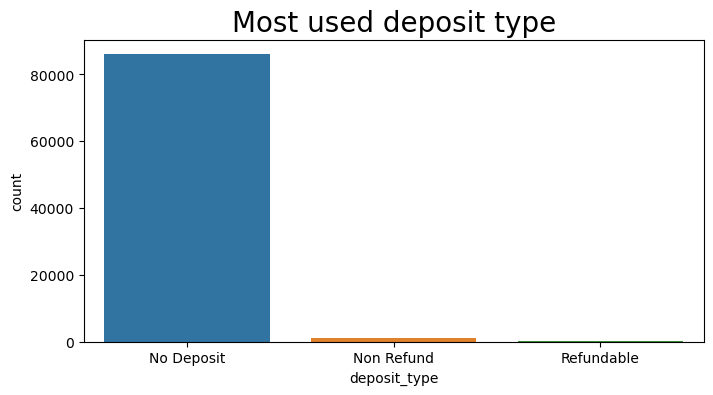

In [61]:
deposit = df1['deposit_type'].value_counts().index

plt.figure(figsize=(8,4), dpi=100)


sns.countplot(x=df1['deposit_type'], order= deposit)
plt.title('Most used deposit type', fontsize=20)
plt.show()

**12. MARKET SEGMENT WITH MOST BOOKINGS**

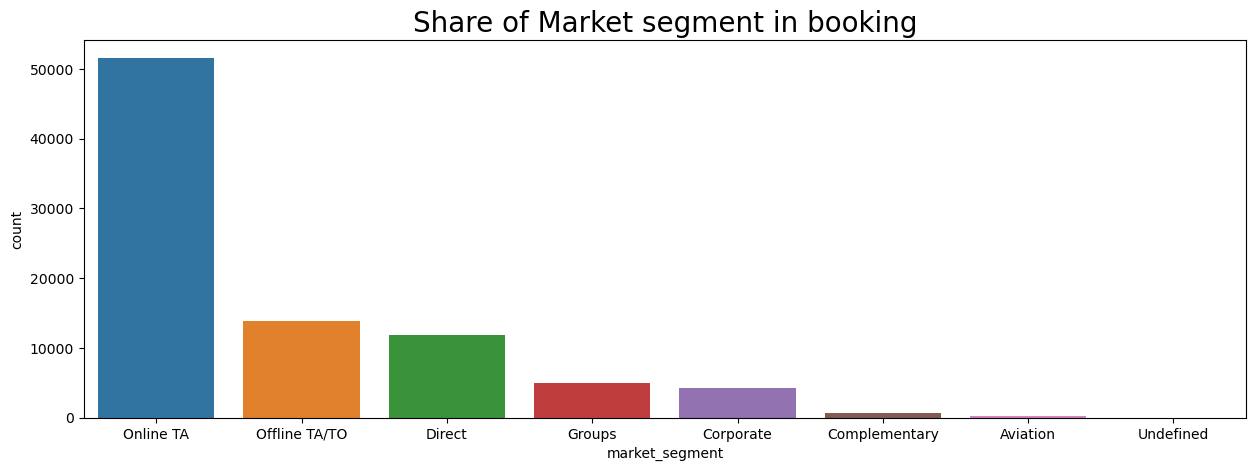

In [62]:
plt.figure(figsize=(15,5), dpi=100)
sns.countplot(x=df1['market_segment'], order = df1['market_segment'].value_counts().index)
plt.title('Share of Market segment in booking', fontsize=20)
plt.show()

*Online TA has the maximum share (around 52000) of market segment in booking.*

**13. REPEATED GUESTS**

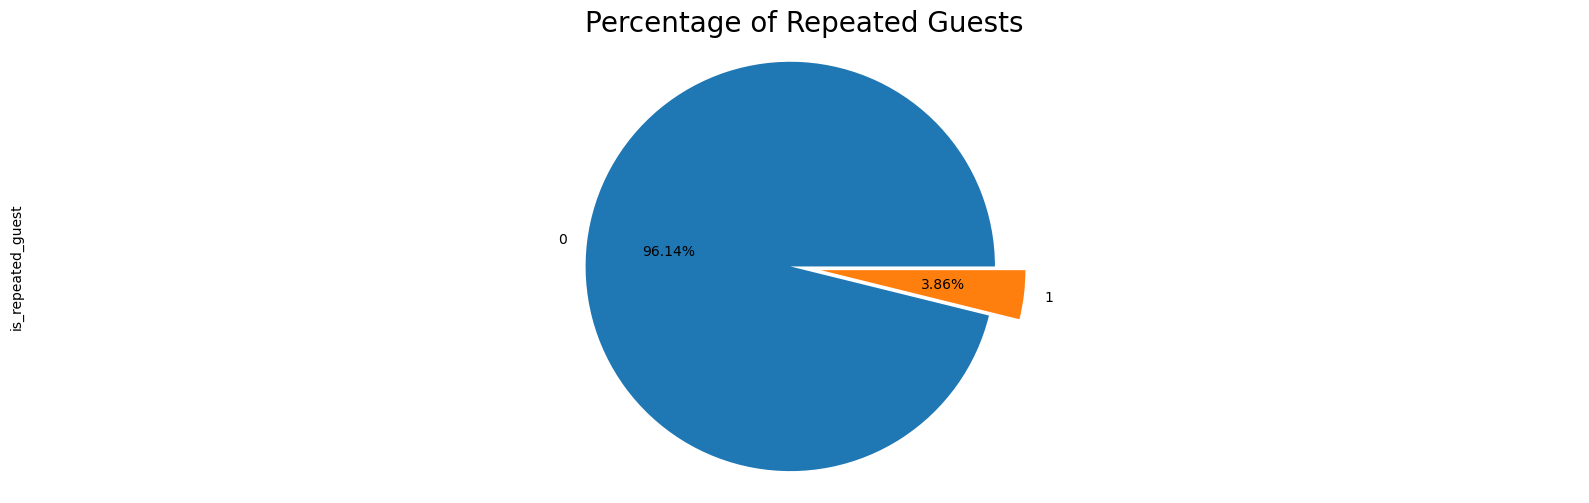

In [72]:
rep_guests = df1['is_repeated_guest'].value_counts()

plt.figure(figsize=(20,6), dpi = 100)

rep_guests.plot.pie(autopct='%1.2f%%', explode=(0.06,0.09),  shadow=False)

plt.title('Percentage of Repeated Guests', fontsize=20)

plt.axis('equal')

plt.show()

*3.86% are repeated guests.*

**14. DISTRIBUTION OF CUSTOMER TYPE**

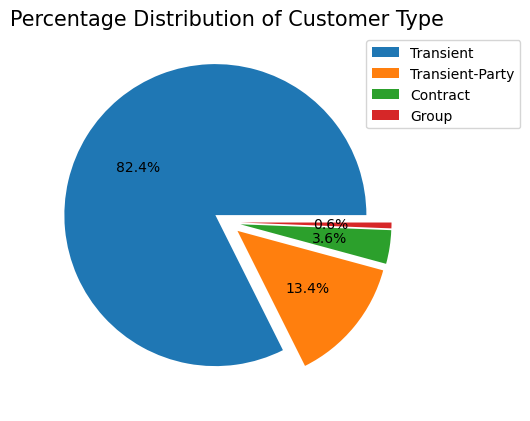

In [64]:
plt.figure(figsize=(10,5), dpi=100)

plt.pie(df1['customer_type'].value_counts().values,
        autopct = '%1.1f%%', explode = (0.09,0.09,0.09,0.09),shadow=False)

labels = df1['customer_type'].value_counts().index.tolist()

plt.title('Percentage Distribution of Customer Type', fontsize = 15)

plt.legend(bbox_to_anchor=(0.85,1), loc='upper left', labels=labels)
plt.show()

*Transient Customer Type made the most bookings(82.40%).*

**15. MAXIMUM NUMBER OF STAYS IN EACH HOTEL**

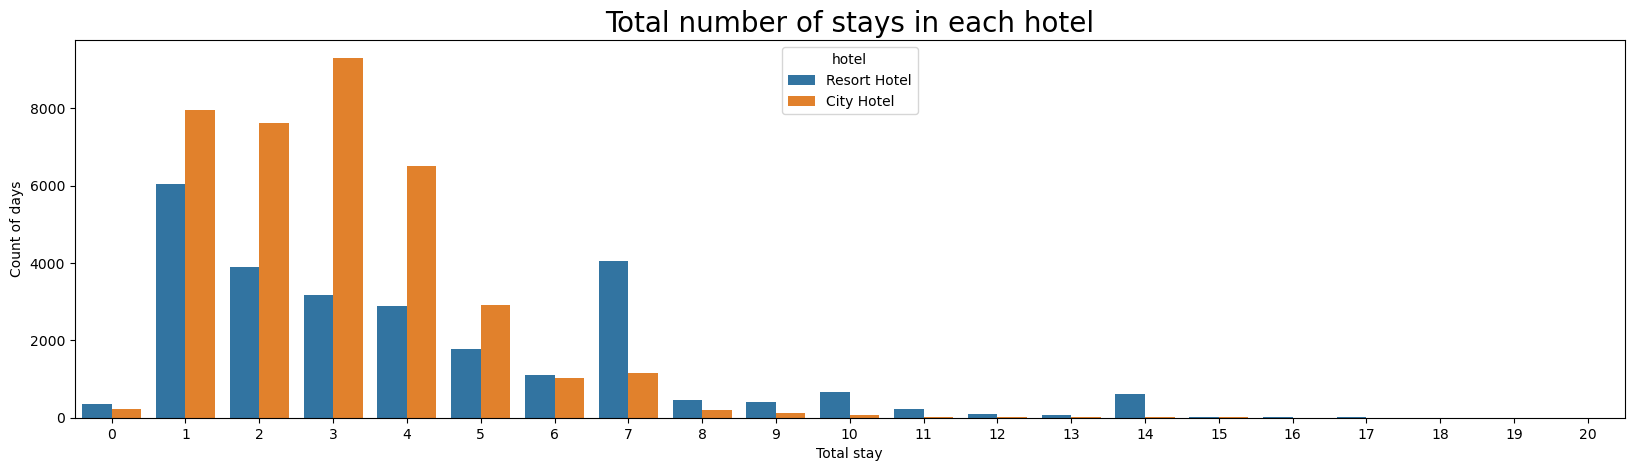

In [65]:
not_cancelled_df = df1[df1['is_canceled'] == 0]

hotel_stay = not_cancelled_df[not_cancelled_df['total_stay'] <= 20]  #Visualizing pattern till 20 days stay

plt.figure(figsize = (20,5), dpi=100)
sns.countplot(x = hotel_stay['total_stay'], hue = hotel_stay['hotel'])

plt.title('Total number of stays in each hotel',fontsize = 20)
plt.xlabel('Total stay')
plt.ylabel("Count of days")
plt.show()

*In Resort hotel most people stayed for only 1 day.*

*In City hotel most people stayed for 3 days.*

**16. HOTEL WITH MAXIMUM ADR**

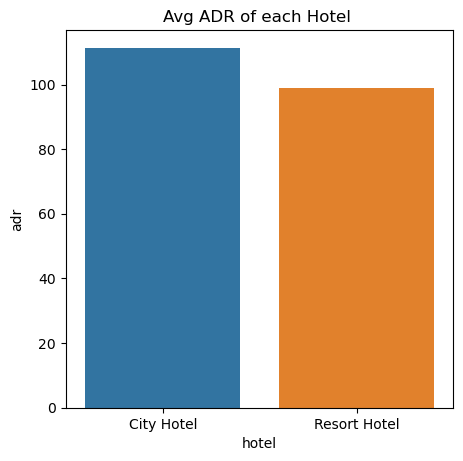

In [90]:

avg_adr=df1.groupby(['hotel'])['adr'].mean().reset_index()

plt.figure(figsize=(5,5), dpi=100)


plt.xlabel('Hotel type')
plt.ylabel('ADR')
plt.title("Avg ADR of each Hotel ")

sns.barplot(x=avg_adr['hotel'],y=avg_adr['adr'])

plt.show()

*City hotel has the highest average adr.*

**17. HOTEL WITH LONGER WAITING TIME**

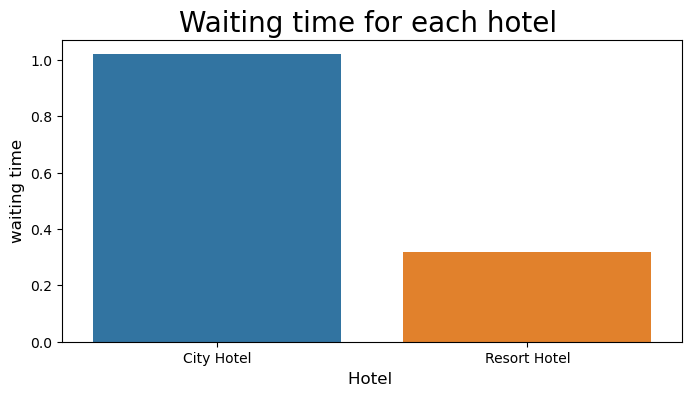

In [85]:
wait_time_df = df1.groupby('hotel')['days_in_waiting_list'].mean().reset_index()

plt.figure(figsize=(8,4), dpi=100)
sns.barplot(x=wait_time_df['hotel'],y=wait_time_df['days_in_waiting_list'])

plt.xlabel('Hotel ',fontsize=12)
plt.ylabel('waiting time',fontsize=12)
plt.title("Waiting time for each hotel ",fontsize=20)

plt.show()

*City Hotel has a longer waiting time compared to Resort Hotel.*

**18. HOTEL WITH MOST REPEATED GUESTS**

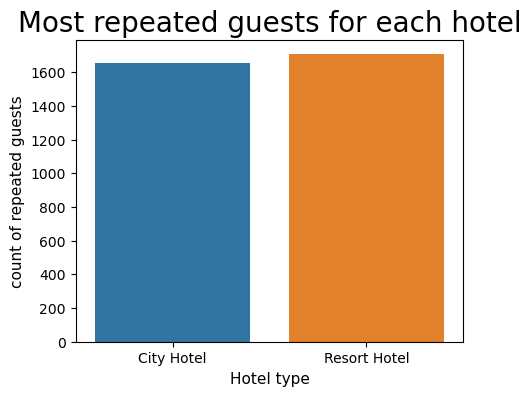

In [76]:
rep_guest = df1[df1['is_repeated_guest']==1].groupby('hotel').size().reset_index()

rep_guest = rep_guest.rename(columns={0:'number_of_repated_guests'})

plt.figure(figsize=(5,4), dpi=100)

sns.barplot(x=rep_guest['hotel'],y=rep_guest['number_of_repated_guests'])
plt.xlabel('Hotel type', fontsize=11)
plt.ylabel('count of repeated guests', fontsize=11)
plt.title('Most repeated guests for each hotel', fontsize=20)


plt.show()

*Resort Hotel has slightly more repeated guests than City Hotel.*

**19. ADR ACROSS DIFFERENT MONTHS**

In [82]:

booking_months=df1.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()


months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

booking_months['arrival_date_month']=pd.Categorical(booking_months['arrival_date_month'],categories=months,ordered=True)


booking_months=booking_months.sort_values('arrival_date_month')
booking_months

,arrival_date_month,hotel,adr
8,January,City Hotel,85.269875
9,January,Resort Hotel,49.181693
6,February,City Hotel,89.266427
7,February,Resort Hotel,54.102809
15,March,Resort Hotel,57.590889
14,March,City Hotel,95.193911
0,April,City Hotel,117.314134
1,April,Resort Hotel,79.283805
17,May,Resort Hotel,80.551101
16,May,City Hotel,128.055724


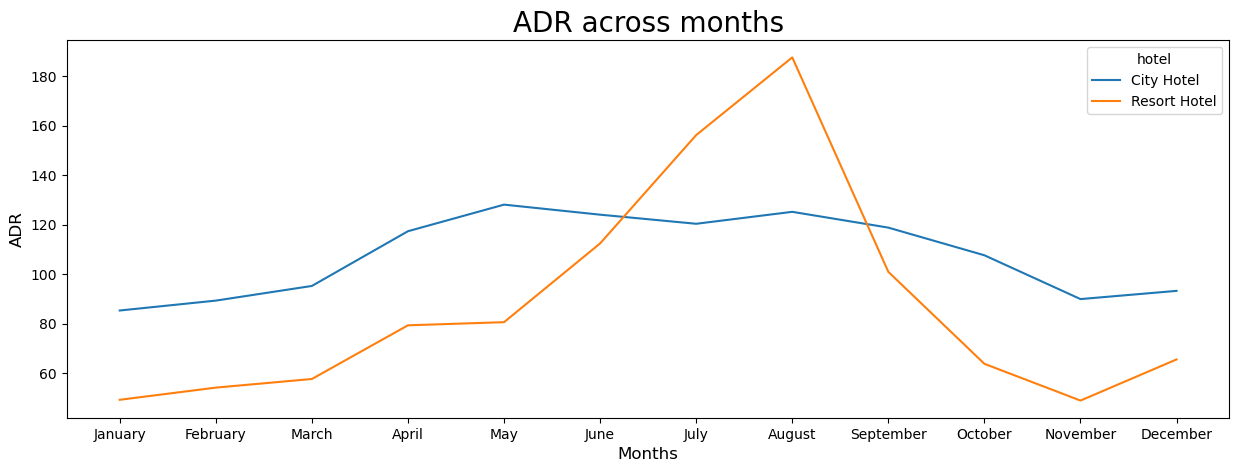

In [84]:
plt.figure(figsize=(15,5), dpi=100)

sns.lineplot(x=booking_months['arrival_date_month'],y=booking_months['adr'],hue=booking_months['hotel'])

plt.title('ADR across months', fontsize=20)
plt.xlabel('Months', fontsize=12)
plt.ylabel('ADR', fontsize=12)

plt.show()

* City Hotel generates more revenue in the month of May compared to other months.
* Resort Hotel generates more revenue in between the month of July and August.


**20. ADR ACROSS DISTRIBUTION CHANNEL**

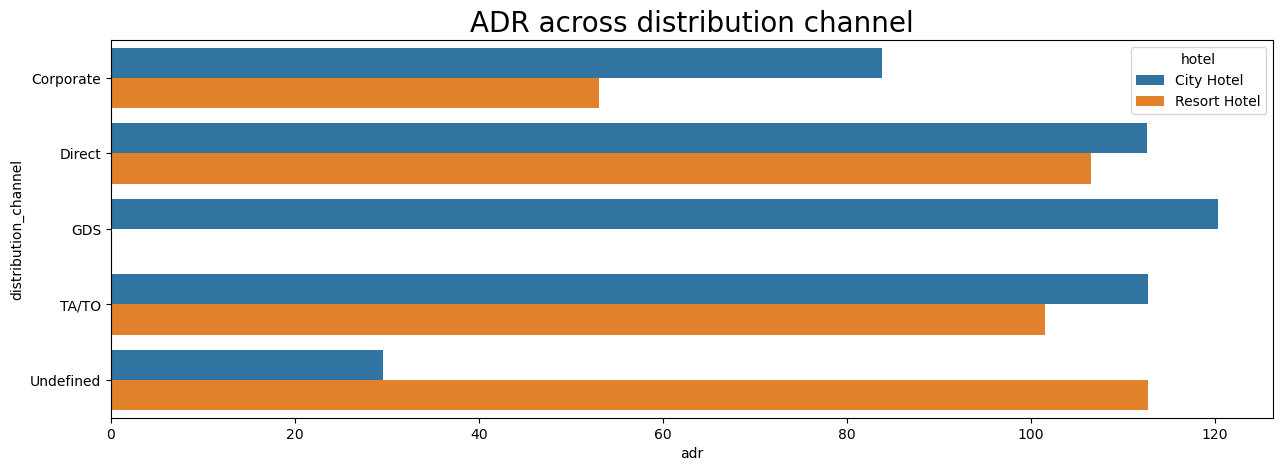

In [71]:

distb_channel_adr = df1.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

plt.figure(figsize=(15,5), dpi=100)

sns.barplot(x='adr', y='distribution_channel', data=distb_channel_adr, hue='hotel')

plt.title('ADR across distribution channel', fontsize=20)

plt.show()

* Corporate- These are corporate hotels booking agencies which makes bookings possible.

* GDS-A Global Distribution System(GDS) is a worldwide reservation system that acts as a conduit between travel bookers and suppliers, such as hotels and other accommodation providers.

* Direct-  bookings are directly made with the respective hotels.
* TA/TO-  booings are made through travel agents or travel operators.
* Undefined- bookings are undefined.


*GDR has contributed more in generating adr.*

**21. CORRELATION HEATMAP**

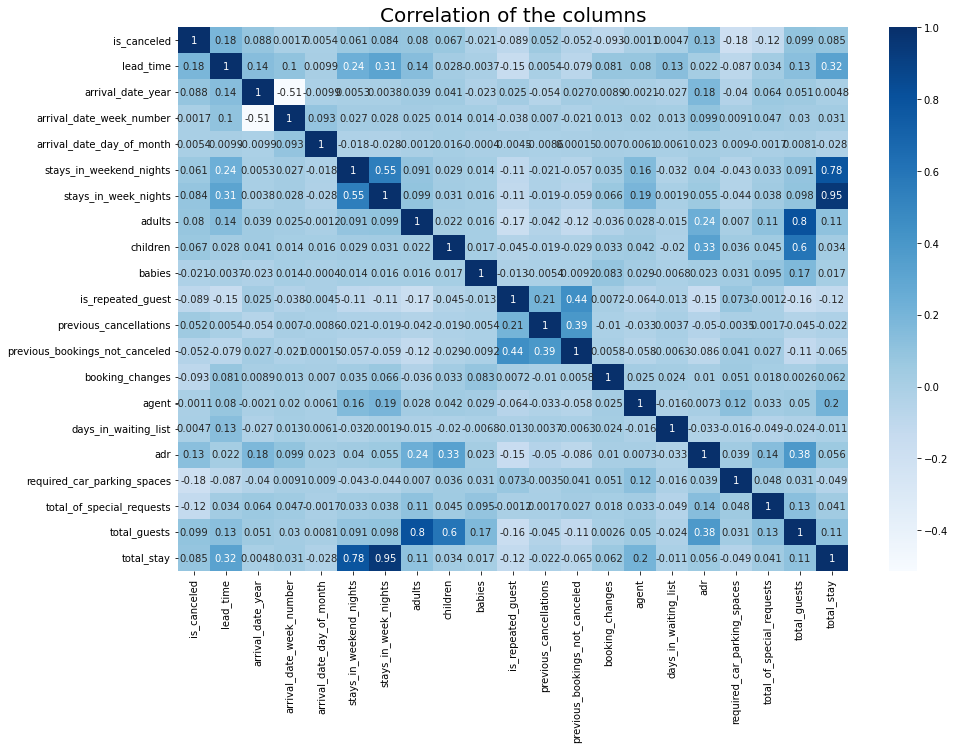

In [78]:
plt.figure(figsize=(15,10))

sns.heatmap(df1.corr(),annot=True, cmap='Blues')   

plt.title('Correlation of the columns', fontsize=20)

plt.show()

Observations:
* total_guests and adr are positively correlated, as total guests increases adr will also increase.
* is_repeated_guest and previous_booking_not_canceled have a strong correlation, as repeated guests don't cancel their        bookings.


# CONCLUSIONS

* City Hotel is the go-to place for most people with 61.07% booking rate.

* Around 27.52% of bookings were cancelled.

* The apex of bookings for both the City and Resort hotels were made in the year 2016.

* Maximum bookings were made in the month of July and August.

* More than 25,000 guests were from Portugal.

* To ensure prompt service, the hotel can proactively stock raw materials for BB (Bed and Breakfast) type of meal, as this meal is most preferred among the guests.

* Room Type A is most preferred by guests.

* TA/TO is the most used distribution channel by customers while booking.

* Online TA has the maximum share (around 52000) of market segment in booking.

* Number of repeated guests are low (around 3.9%), this may suggest that there may be the aspects that hotels are not meeting their preferences.

* Optimal Stay in both the hotels is less than 7 days.

* Transient Customer type made the most bookings(82.40%).

* City Hotel has a higher waiting time campared to Resort Hotels.

* City Hotels generated more revenue compared to Resort Hotels , with higher average adr.

* Resort hotels had the most repeated guests.

*Thus the hotel managements can perform various marketing campaigns, introduce special promotions, discount or package deals to 
incentivize bookings, consider loyalty programs or referral discounts, offer flexible booking options and provide various 
amenities   to increase the number of bookings.*